

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>


## PGE 383 Final Project: Orthogonal Polynomial

#### Axel Jeconiah
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/leiliu96)
_____________________


### Executive Summary

Data scientists frequently encounter challenges related to multicollinearity when constructing regression models. Multicollinearity refers to the situation in which two or more predictor variables in a regression model exhibit a high degree of correlation with each other. The utilization of orthogonal polynomials as basis functions facilitates the conversion of the original predictor features into a collection of orthogonal variables, hence ensuring the absence of multicollinearity. In this approach, we have discovered that assessing the extent of multicollinearity in the dataset enables us to evaluate the suitability of employing orthogonal polynomials for constructing the regression model. In future applications involving orthogonal polynomials, it is advisable to optimize the degree of polynomial transformation employed. 
_____________________

### Import Packages

We will be importing some standard packages that hould have been installed with Anaconda 3.

In [1]:
import numpy as np                              # ndarrys for gridded data
import pandas as pd                             # DataFrames for tabular data
import matplotlib.pyplot as plt                 # for plotting
from scipy import linalg                        # for linear regression
import seaborn as sns                           # for matrix scatter plots
from sklearn.preprocessing import MinMaxScaler  # for minmax normalization   
from scipy.special import legendre              # for applying Legrendre polynomials
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.model_selection import train_test_split # for test-train split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')               # hide warnings

### Functions

The following functions will be used in the workflow.

In [2]:
def legendre_transform(x, degree):
    """
    Parameters:
    - x: Input data (1D array)
    - degree: Degree of Legendre polynomials

    Returns:
    - Transformed features
    """
    transformed_features = np.zeros((len(x), degree + 1))

    for i in range(degree + 1):
        transformed_features[:, i] = legendre(i)(x)

    return transformed_features

_____________________
### Load Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.

The following data set and code block is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_Feature_Transformations.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Transformations.ipynb).


In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load the data from my github repo

We can preview the DataFrame by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the head command, add parameter 'n=13' to see the first 13 rows of the dataset.

In [4]:
df.head(n=13)                             # we could also use this command for a table preview

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


This dataset has features from 200 unconventional wells including: 

0. well index
1. well average porosity (%) 
2. permeability (mD)
3. accoustic impedance (kg/m2s*10^6)
4. brittness ratio (%) 
5. total organic carbon (%) 
6. vitrinite reflectance (%)
8. normalized initial production 90 day average (MCFPD). 

Note, the dataset is synthetic, but has realistic ranges and general multivariate relationships.

_____________________
### Orthogonal Polynomial Workflow

These are the workflow to demonstrate the impact of orthogonal polynomials to decorrelate and improve predictions with polynomial basis functions.

1. Asses collinearity of the data

2. Normalization of the data

3. Apply Legendre Polynomials as basis function

4. Build the regression model

5. Asses the effectiveness of Legendre Polynomials in improving model


### 1. Asses Collinearity of The Data

To better demonstrate the effectiveness of orthogonal polynomial transformation to decorrelate data, we first need to asses the features that has high level of collineariy. 

We will do this by simply creating a matrix scatter plot to observe the bivarate relationships and visually choose 2 features with high collineariy. 

The following data set and code block is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_Feature_Transformations.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Transformations.ipynb).

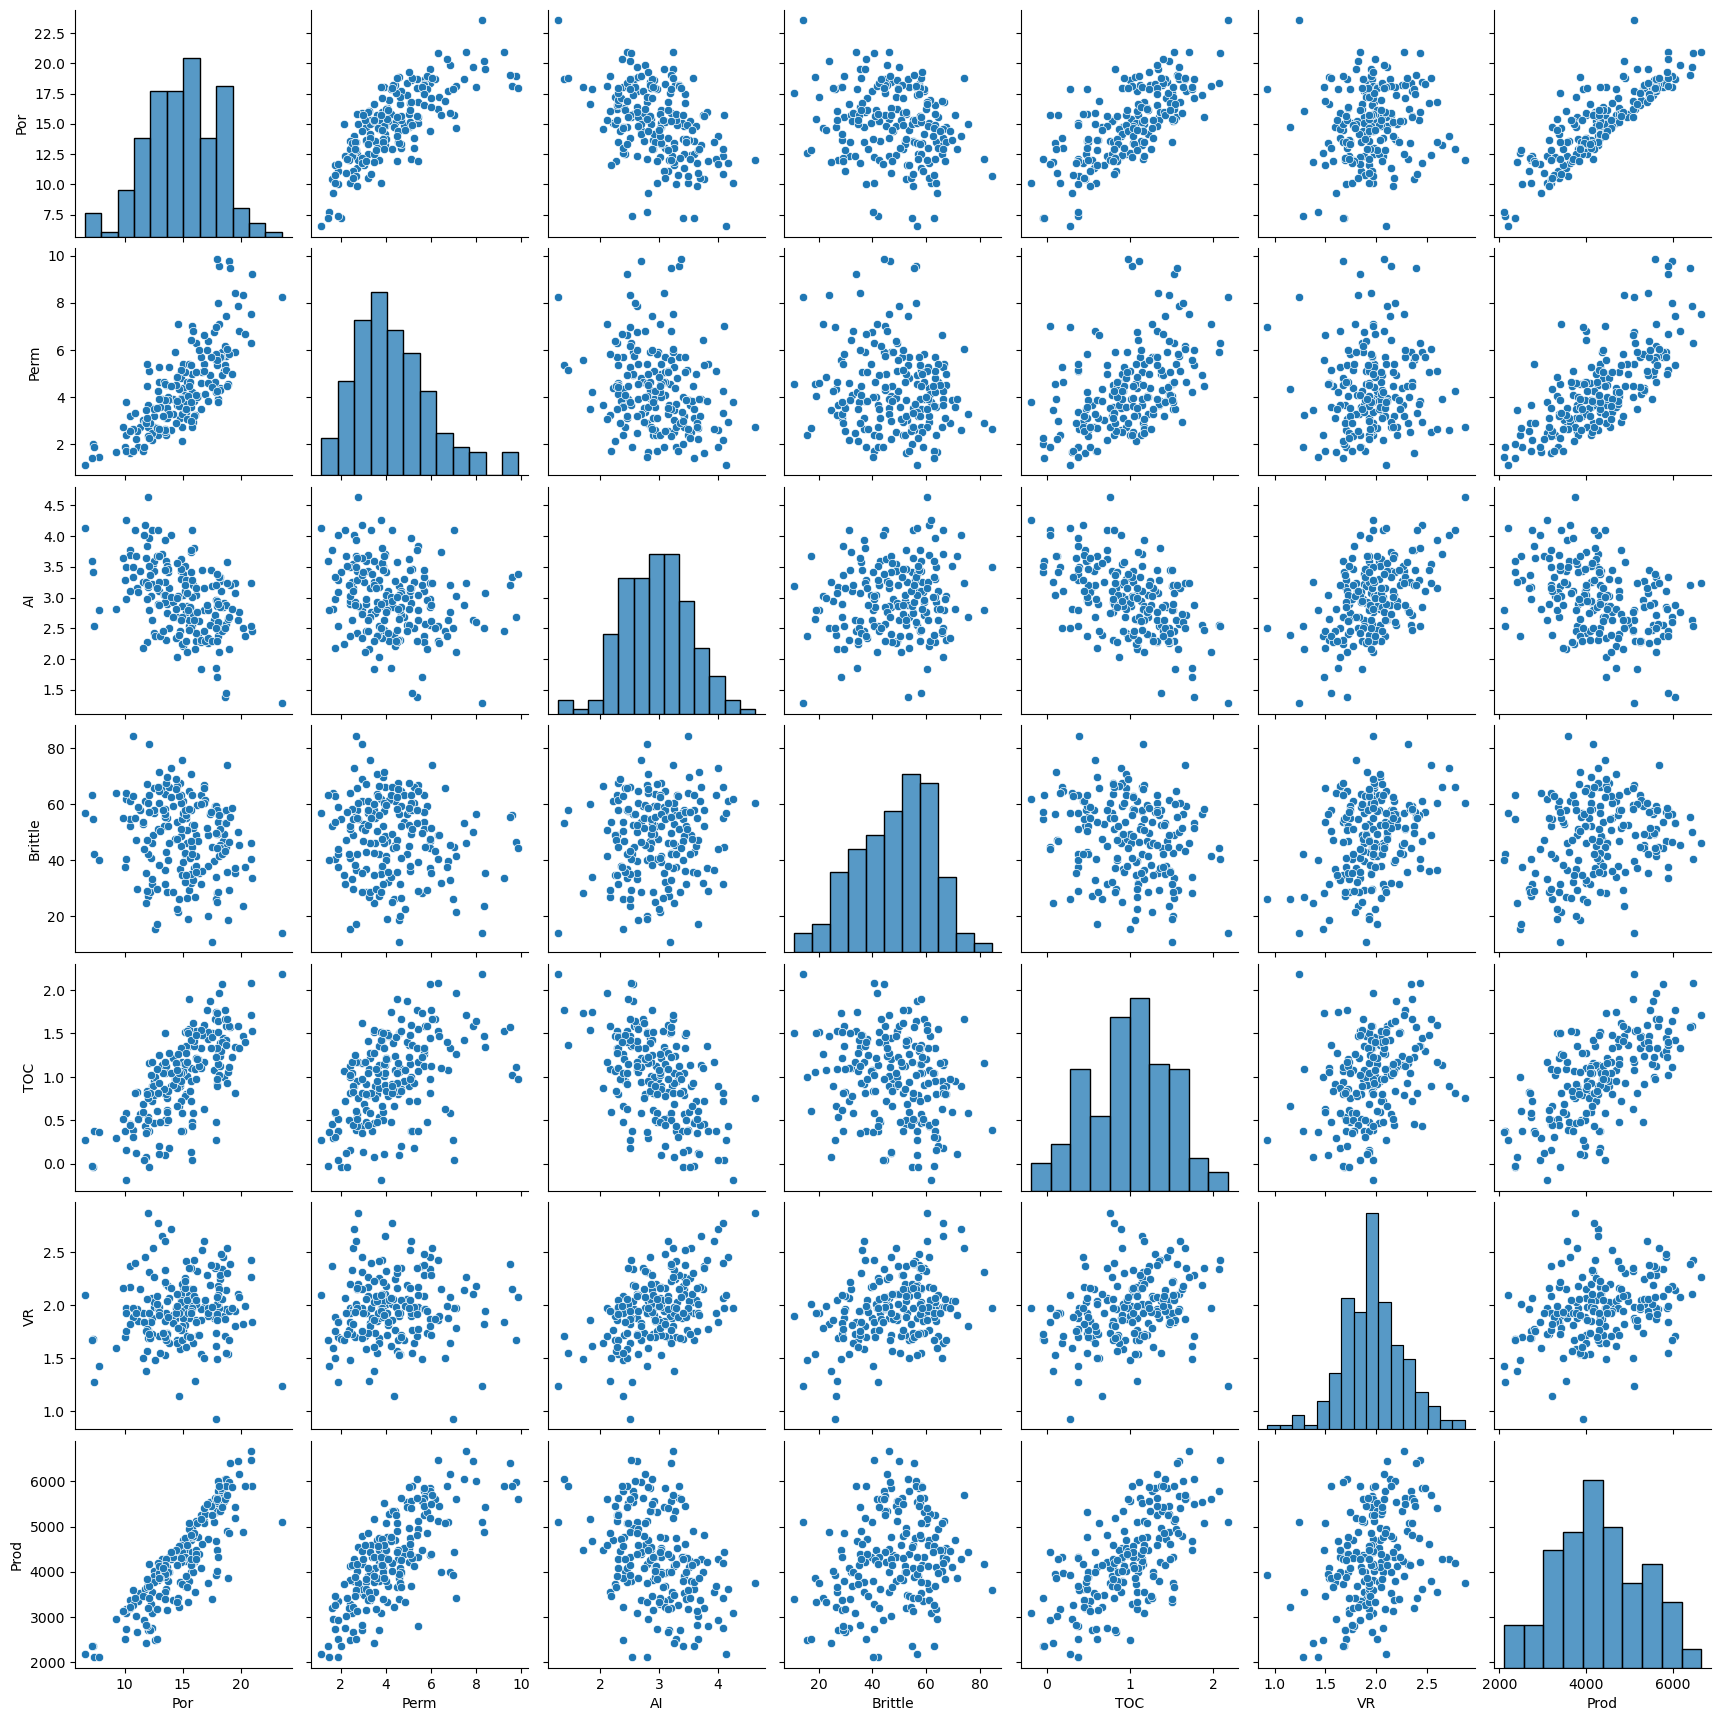

In [5]:
sns.pairplot(df,vars=['Por','Perm','AI','Brittle','TOC','VR','Prod'],markers='o')

Here we see that porosity and permeability have almost a monotonic near linear relastionship. We will choose these two features to decorrelate. 

We will now cut down the rest of features for simplication. 

In [6]:
df_new = df.iloc[:, [1, 2, 7]]  # 1 and 2 are the indices of 'Porosity' and 'Permeability.' 7 is Production
df_new.head()

,Por,Perm,Prod
0,12.08,2.92,4165.196191
1,12.38,3.53,3561.146205
2,14.02,2.59,4284.348574
3,17.67,6.75,5098.680869
4,17.52,4.57,3406.132832


This will now be our new data frame that we will use for the rest of the workflow.

### 2. Normalization of The Data

In this workflow we choose Legendre polynomials as our orthogonal polynomial basis function. 

Before applying Legendre polynomials to porosity and permeability. We need to normalize the data over the interval [-1,1] because this is the range where our function is orthogonal. 

In [7]:
column_names = df_new.columns
scaler = MinMaxScaler()                                           #Instantiate
normalized_data = scaler.fit_transform(df_new)                    #Transform
norm_df = pd.DataFrame(normalized_data, columns=column_names)     #Create new df

norm_df.describe()

,Por,Perm,Prod
count,200.000000,200.000000,200.000000
mean,0.496538,0.366219,0.483830
std,0.174775,0.198057,0.217768
min,0.000000,0.000000,0.000000
25%,0.374265,0.227975,0.331672
50%,0.501176,0.332380,0.478006
75%,0.638382,0.475686,0.653926
max,1.000000,1.000000,1.000000


Our normalized data set now has it's range inside [-1, 1]. 

### 3. Apply Legendre Polynomials as Basis Function

Now we apply Legendre polynomicals to the normalized porosity, permeability, and production data. 

In [31]:
degree = 1                                                 # Set the degree of Legendre polynomials

x1 = norm_df['Por'].values                                 # defining variables
x2 = norm_df['Perm'].values
y_true = norm_df['Prod'].values

t_x1 = legendre_transform(x1, degree)           # Perform Legendre polynomial feature transformation
t_x2 = legendre_transform(x2, degree)           
t_y_true = legendre_transform(y_true, degree) 

We have now transformed our features. The number of degree of polynomial transform we use can vary based on the required complexity of the transformation. This can be optimazed and act like a hyperparameter. 

Lets visualize this and again using the matrix scatter plot.

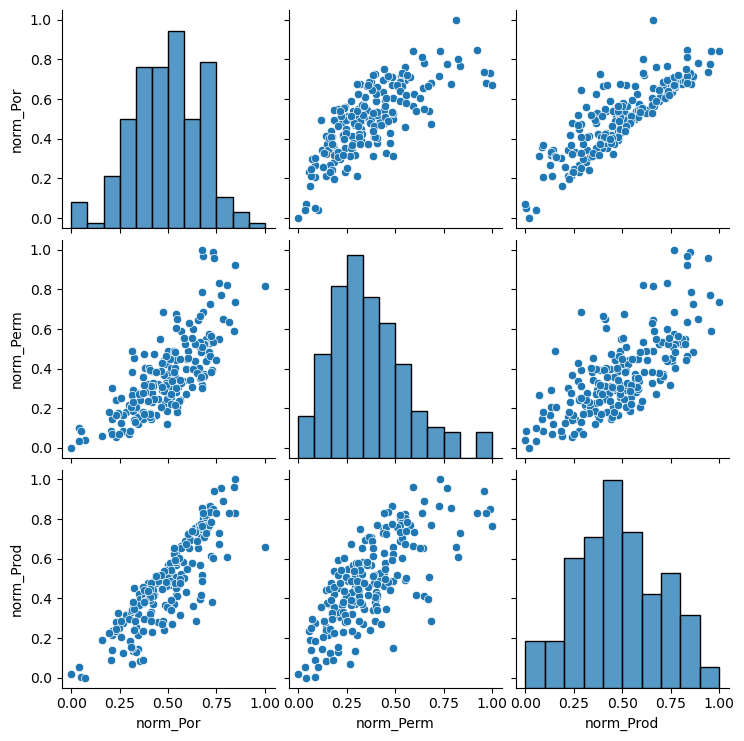

In [32]:
data = {'norm_Por' : t_x1[:,degree],                                          # Creating the new data frame consisting of transformed features of 4th degree
        'norm_Perm' : t_x2[:,degree],
        'norm_Prod' : t_y_true[:,degree]}

t_df = pd.DataFrame(data)

sns.pairplot(t_df,vars=['norm_Por','norm_Perm','norm_Prod'],markers='o')  # Visualizing the new data 

As we can see here, porosity vs. permeability is not linearly related anymore and we have successfully decorrelate the two variables. 

### 4. Build The Regression Model

With these transformed features we will now build a linear regression model.

Mean Squared Error: 0.00716609904170093


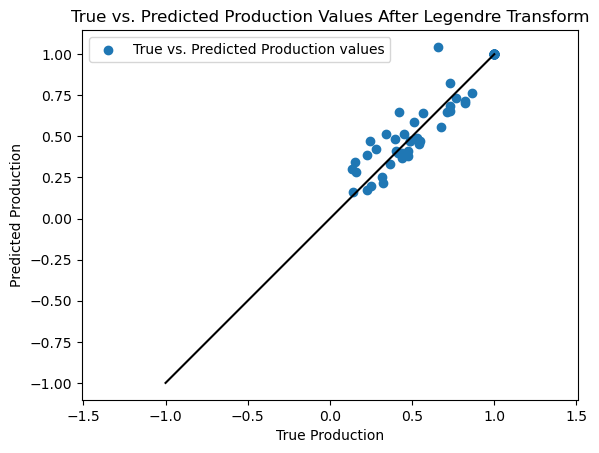

In [50]:
t_data = t_df[['norm_Por', 'norm_Perm']].to_numpy()

t_x_train, t_x_test, t_y_train, t_y_test = train_test_split(t_data, t_y_true, test_size=0.2, random_state=42) # Split the data into training and testing sets

t_model = LinearRegression()    # Build the linear model
t_model.fit(t_x_train, t_y_train)

t_y_pred = t_model.predict(t_x_test) # Make predictions on the test set

t_mse = mean_squared_error(t_y_test, t_y_pred) # Evaluate the model
print(f"Mean Squared Error: {t_mse}")

# Plot the results
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
plt.scatter(t_y_test, t_y_pred, label='True vs. Predicted Production values')
plt.plot(x, y, color = 'black')
plt.title('True vs. Predicted Production Values After Legendre Transform')
plt.xlabel('True Production')
plt.ylabel('Predicted Production')
plt.axis('equal')
plt.legend()
plt.show()

We now have a linear model that is created using the tranformed featrues. This model is good as indicated by the True vs. Predicted values that are close to a line with slope of 1. 

However, we want to understand how this model perform compared to the original data. 

### 5. Asses The Effectiveness of Legendre Polynomials in Improving Model

First, we want to create a linear model with the original data. 

Mean Squared Error: 0.014332198083401856


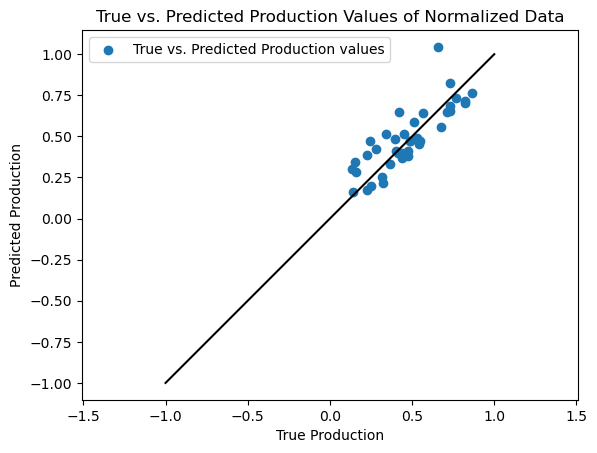

In [49]:
data = norm_df[['Por', 'Perm']].to_numpy()
y_true = norm_df[['Prod']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(data, y_true, test_size=0.2, random_state=42) # Split the data into training and testing sets

model = LinearRegression()    # Build the linear model
model.fit(x_train, y_train)

y_pred = model.predict(x_test) # Make predictions on the test set

mse = mean_squared_error(y_test, y_pred) # Evaluate the model
print(f"Mean Squared Error: {mse}")

# Plot the results
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
plt.scatter(y_test, y_pred, label='True vs. Predicted Production values')
plt.plot(x, y, color = 'black')
plt.title('True vs. Predicted Production Values of Normalized Data')
plt.xlabel('True Production')
plt.ylabel('Predicted Production')
plt.axis('equal')
plt.legend()
plt.show()

To compare the model we got after tranformation with this model, we need to back-transform the predicted value that we got from the model with transformed features. 

_____________________
### Results

Here are the results summary of the workflow

Mean Squared Error of normalized original data: 0.014332198083401856
Mean Squared Error of transformed data: 0.00716609904170093


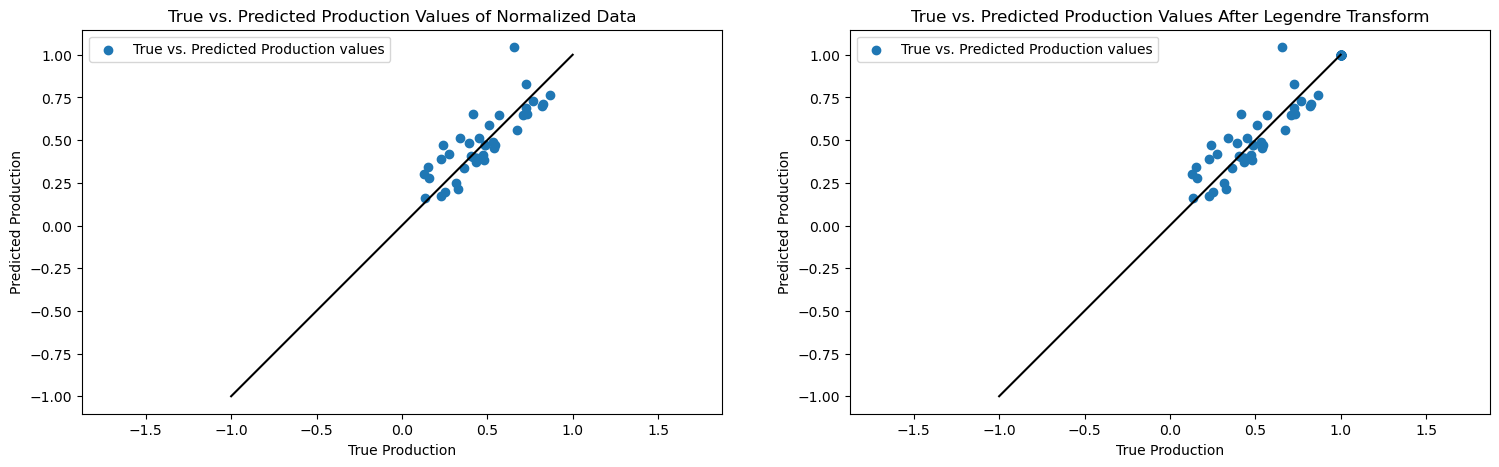

In [48]:
print(f"Mean Squared Error of normalized original data: {mse}")
print(f"Mean Squared Error of transformed data: {t_mse}")

plt.subplot(121)
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
plt.scatter(y_test, y_pred, label='True vs. Predicted Production values')
plt.plot(x, y, color = 'black')
plt.title('True vs. Predicted Production Values of Normalized Data')
plt.xlabel('True Production')
plt.ylabel('Predicted Production')
plt.axis('equal')
plt.legend()

plt.subplot(122)
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
plt.scatter(t_y_test, t_y_pred, label='True vs. Predicted Production values')
plt.plot(x, y, color = 'black')
plt.title('True vs. Predicted Production Values After Legendre Transform')
plt.xlabel('True Production')
plt.ylabel('Predicted Production')
plt.axis('equal')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.8, wspace=0.2, hspace=0.2)

plt.show()

By employing the Legendre polynomial function, we were able to transformed the features, resulting in a more refined model with a reduced mean squared error (MSE). In this example, we observe that utilizing Legendre polynomials of degree 1 yields a more optimal function, while employing higher degree transforms lead to overfitting and an increase in mean squared error (MSE). This observation suggests that the Legendre polynomial transform exhibits optimal performance when applied only to datasets characterized by a substantial degree of collinearity. Furthermore, the choice of polynomial degree can be considered as a hyperparameter that also influences the model's performance. 


I hope this was helpful,

Axel Jeconiah.

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
